In [4]:
!pip install torch torchvision matplotlib seaborn scikit-learn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Epoch 1/10 Loss: 15.7339
Epoch 2/10 Loss: 13.1142
Epoch 3/10 Loss: 12.6444
Epoch 4/10 Loss: 12.0595
Epoch 5/10 Loss: 11.5506
Epoch 6/10 Loss: 10.1678
Epoch 7/10 Loss: 9.2385
Epoch 8/10 Loss: 8.7231
Epoch 9/10 Loss: 6.4680
Epoch 10/10 Loss: 4.9717


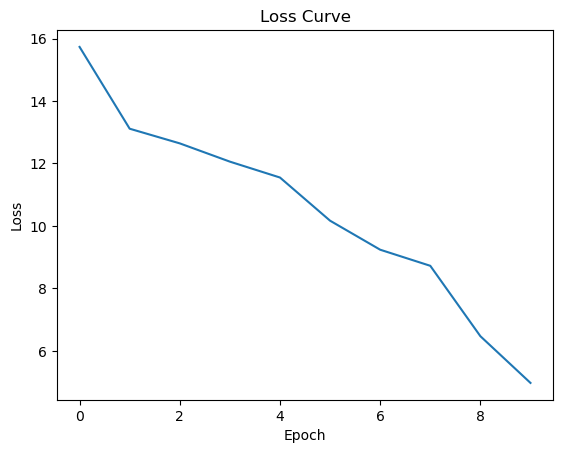

Test Accuracy: 90.19607843137256


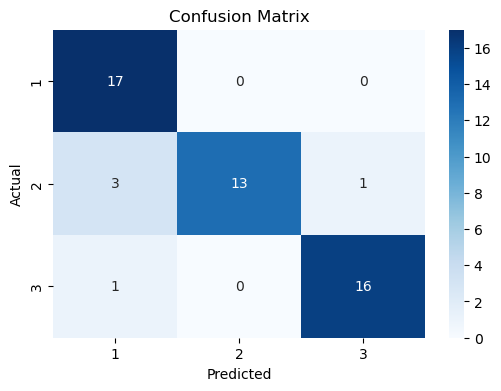

In [5]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder("Downloads/Dataset/train", transform=transform)
test_data = datasets.ImageFolder("Downloads/Dataset/test", transform=transform)
valid_data = datasets.ImageFolder("Downloads/Dataset/valid", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, len(train_data.classes))
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        return self.fc2(x)

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
epochs = 10

for epoch in range(1, epochs+1):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    print(f"Epoch {epoch}/{epochs} Loss: {running_loss:.4f}")

plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print("Test Accuracy:", 100 * correct / total)

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

labels_list = list(range(len(train_data.classes)))

cm = confusion_matrix(all_labels, all_preds, labels=labels_list)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [6]:
!pip install graphviz


In [7]:
!pip install graphviz
from graphviz import Graph

def draw_graph():
    g = Graph("CNN_Architecture")

    g.node("Input", "Input Image\n128×128×3")
    g.node("Conv1", "Conv2D\n3→16\n3×3")
    g.node("Pool1", "MaxPool 2×2")
    g.node("Conv2", "Conv2D\n16→32\n3×3")
    g.node("Pool2", "MaxPool 2×2")
    g.node("Flatten", "Flatten\n32×32×32")
    g.node("FC1", "Fully Connected\n128 neurons")
    g.node("FC2", "Output Layer")

    g.edge("Input", "Conv1")
    g.edge("Conv1", "Pool1")
    g.edge("Pool1", "Conv2")
    g.edge("Conv2", "Pool2")
    g.edge("Pool2", "Flatten")
    g.edge("Flatten", "FC1")
    g.edge("FC1", "FC2")

    return g

draw_graph()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH